In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the customer support dataset into a Pandas DataFrame
data = pd.read_csv('Customer_support_data.csv')

# Display the first five rows of the dataset for a quick preview
data.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
# Checking the percentage of missing values in the dataset
percentage = (data.isna().sum())/len(data) * 100
percentage

Unique id                   0.000000
channel_name                0.000000
category                    0.000000
Sub-category                0.000000
Customer Remarks           66.542889
Order_id                   21.222950
order_date_time            79.962052
Issue_reported at           0.000000
issue_responded             0.000000
Survey_response_Date        0.000000
Customer_City              80.119199
Product_category           79.983005
Item_price                 79.971364
connected_handling_time    99.718300
Agent_name                  0.000000
Supervisor                  0.000000
Manager                     0.000000
Tenure Bucket               0.000000
Agent Shift                 0.000000
CSAT Score                  0.000000
dtype: float64

In [5]:
data.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

In [6]:
data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [7]:
data.duplicated().sum()

0

In [8]:
df = data.copy()
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [9]:
df.tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


In [10]:
df = df.drop(columns= 'connected_handling_time')


In [11]:
df = df.dropna(subset='Order_id')

In [12]:
df['Customer Remarks'] = df['Customer Remarks'].fillna('No remarks')


In [13]:
df['Product_category'] = df['Product_category'].fillna('Not Available')

In [14]:
df['Customer_City'] = df['Customer_City'].fillna('Not Given')

In [15]:
def clean_text(text_series):
    cleaned = (
        text_series
        .str.lower()
        .str.replace(r'[^a-z\s]', '', regex=True)
        .str.replace(r'\s+', ' ', regex=True)
        .str.strip()
    )
    # Replace blanks with NaN, then fill with 'no remarks'
    return cleaned.replace(r'^\s*$', np.nan, regex=True).fillna('no remarks')


# Apply
df['Customer Remarks'] = clean_text(df['Customer Remarks'])


In [16]:
## Date Feature - Response Time Calculation
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M', errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Survey_response_Date'] = pd.to_datetime(df['Survey_response_Date'], format='%d-%b-%y', errors='coerce')
df['order_date_time'] = pd.to_datetime(df['order_date_time'],format='%d/%m/%Y %H:%M', errors = 'coerce')

In [17]:
df['order_date_time'] = df.groupby('Survey_response_Date')['order_date_time'].transform(lambda x: x.fillna(x.median()))

In [18]:
df['day'] = df['order_date_time'].dt.day_name()
df['year'] = df['order_date_time'].apply(lambda x: x.year)
df['month_num'] = df['order_date_time'].apply(lambda x: x.month)
df['day_num'] =df['order_date_time'].apply(lambda x: x.day)
df['hour'] = df['order_date_time'].apply(lambda x: x.hour)
df['minute'] = df['order_date_time'].apply(lambda x: x.minute)
df['month'] = df['order_date_time'].dt.month_name()
df['Response_Time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df = df[df['Response_Time_minutes'] >= 0]  # Remove bad rows

df['wait_time_minutes'] = (
    df['Issue_reported at'] - df['order_date_time']
).dt.total_seconds() / 60

df = df.drop(columns=['Issue_reported at', 'issue_responded','order_date_time'])


In [19]:
df['Tenure Bucket'].value_counts()

Tenure Bucket
>90                22984
On Job Training    19444
31-60               8869
0-30                8265
61-90               4985
Name: count, dtype: int64

In [20]:
experience_mapping = {
    "On Job Training": "Beginner",
    "0-30": "Beginner",
    "31-60": "Intermediate",
    "61-90": "Intermediate",
    ">90": "Advanced"
}

df["Experience_Level"] = df["Tenure Bucket"].map(experience_mapping)


In [21]:
# Drop the original column if replaced
df.drop(columns=["Tenure Bucket"], inplace=True)


In [22]:
df = df.drop(columns='Item_price')

In [23]:
df['satisfaction_label'] = df['CSAT Score'].apply(lambda x: 'Satisfied' if pd.to_numeric(x, errors='coerce') >= 4 else 'Unsatisfied')

In [24]:
# Map 'satisfaction_label' to numeric: Satisfied -> 1, Unsatisfied -> 0
df['satisfaction_target'] = df['satisfaction_label'].map({'Satisfied': 1, 'Unsatisfied': 0})

In [25]:
df = df.drop(columns= 'satisfaction_label')

In [26]:

# # Filling Null values of Item_price Column.
# df['Item_price'] = df['Item_price'].fillna(0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64547 entries, 0 to 85906
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique id              64547 non-null  object        
 1   channel_name           64547 non-null  object        
 2   category               64547 non-null  object        
 3   Sub-category           64547 non-null  object        
 4   Customer Remarks       64547 non-null  object        
 5   Order_id               64547 non-null  object        
 6   Survey_response_Date   64547 non-null  datetime64[ns]
 7   Customer_City          64547 non-null  object        
 8   Product_category       64547 non-null  object        
 9   Agent_name             64547 non-null  object        
 10  Supervisor             64547 non-null  object        
 11  Manager                64547 non-null  object        
 12  Agent Shift            64547 non-null  object        
 13  CSAT S

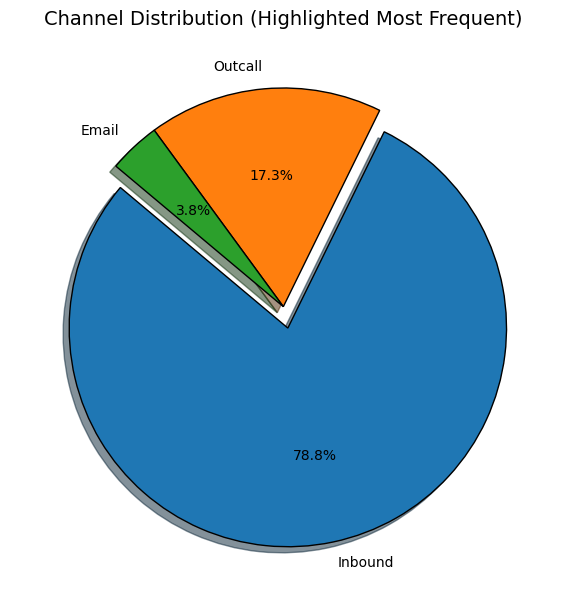

In [28]:
import matplotlib.pyplot as plt

# Calculate value counts and the most frequent channel
channel_counts = df['channel_name'].value_counts()
most_frequent_channel = channel_counts.idxmax()

# Create explode list to highlight the most frequent channel
explode = [0.1 if channel == most_frequent_channel else 0 for channel in channel_counts.index]

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct='%1.1f%%',
    explode=explode,
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Channel Distribution (Highlighted Most Frequent)', fontsize=14)
plt.tight_layout()
plt.show()

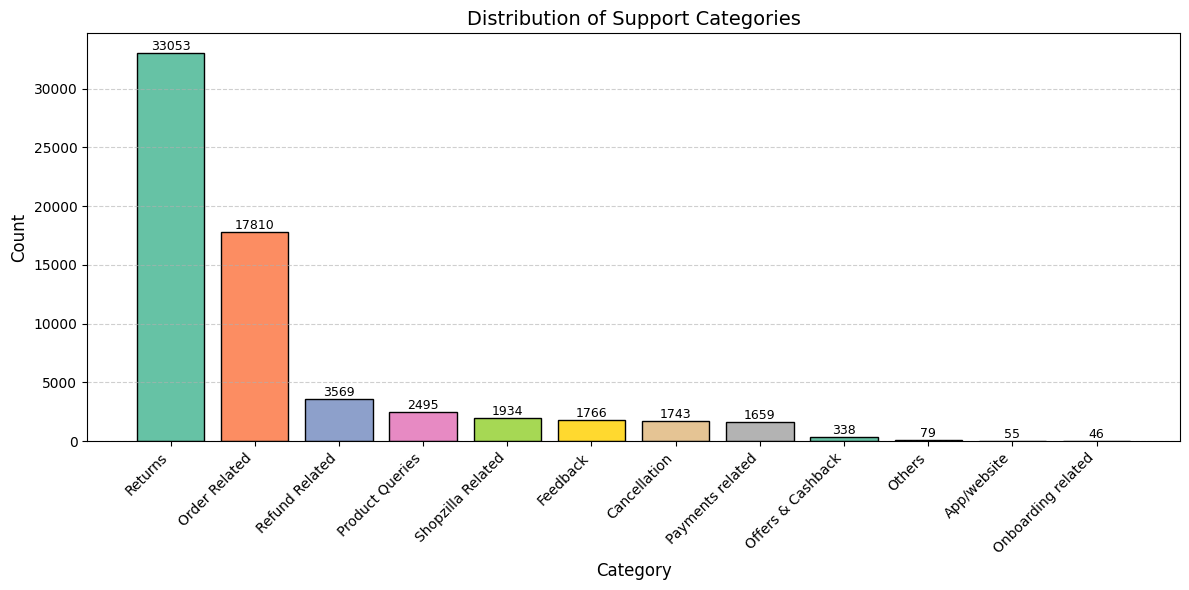

In [29]:
import matplotlib.pyplot as plt

# Calculate category counts
category_counts = df['category'].value_counts()

# Set up the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    category_counts.index,
    category_counts.values,
    color=plt.cm.Set2.colors,
    edgecolor='black'
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), ha='center', va='bottom', fontsize=9)

# Labels and styling
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Support Categories', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


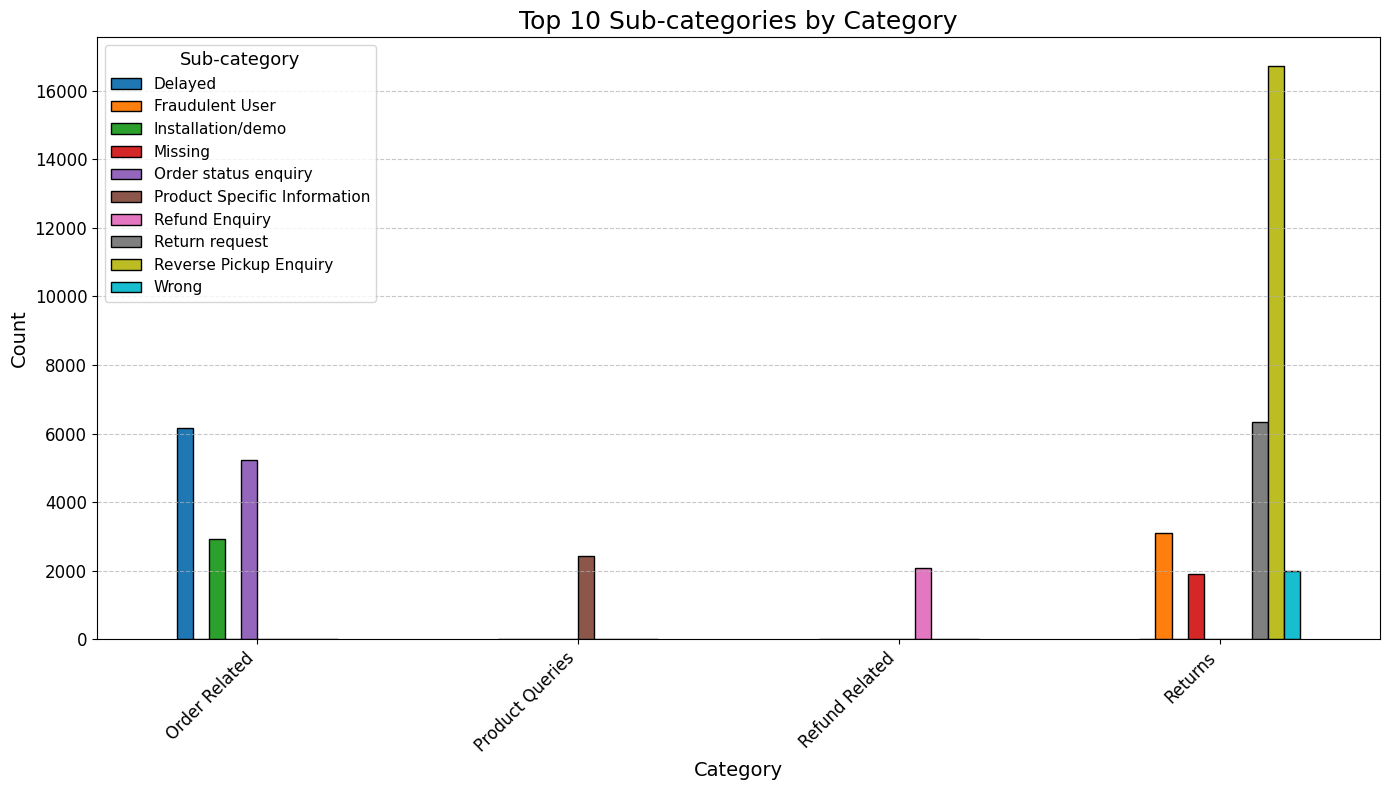

In [30]:
import matplotlib.pyplot as plt

# Group by 'category' and 'Sub-category', then get counts
grouped = df.groupby(['category', 'Sub-category']).size().reset_index(name='count')

# Get top 10 combinations by count
top_10 = grouped.sort_values('count', ascending=False).head(10)

# Pivot for bar plot
pivot_df = top_10.pivot(index='category', columns='Sub-category', values='count').fillna(0)

# Plot
ax = pivot_df.plot(kind='bar', figsize=(14, 8), edgecolor='black')

# Styling
plt.title('Top 10 Sub-categories by Category', fontsize=18)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Sub-category', title_fontsize=13, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


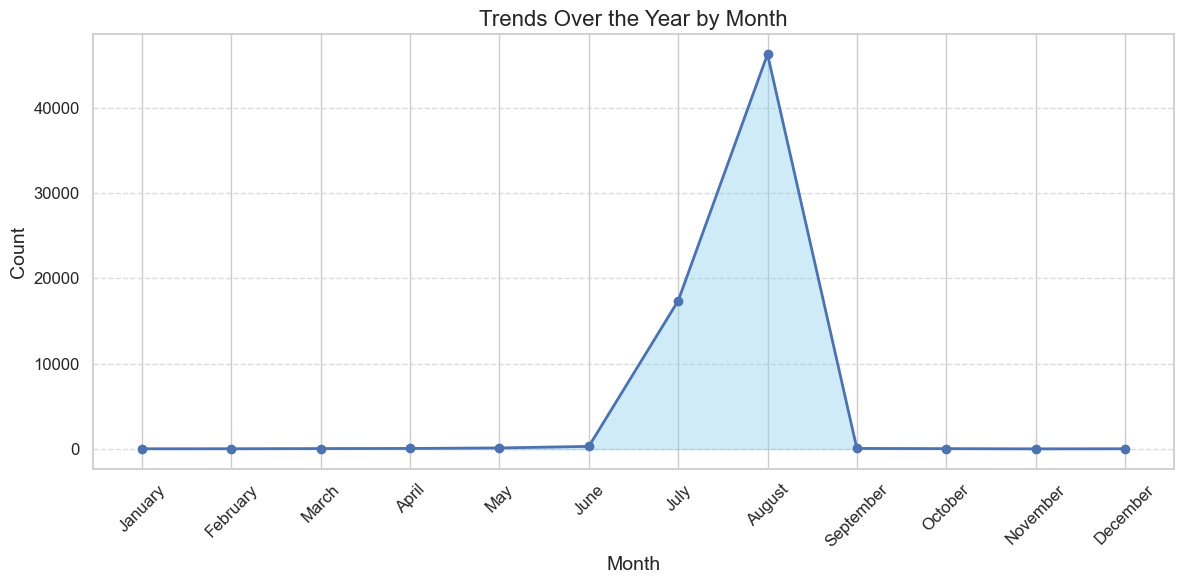

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'month' is in string format
df['month'] = df['month'].astype(str).str.title()

# Define the correct order of months
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

# Count trends and reorder
monthly_trends = df['month'].value_counts().reindex(ordered_months, fill_value=0)

# Plot setup
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

# Area chart
plt.fill_between(monthly_trends.index, monthly_trends.values, color='skyblue', alpha=0.4)

# Line chart
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', color='b', linewidth=2)

# Labels and formatting
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Trends Over the Year by Month', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_29144\4178354883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=orders_day.index, y=orders_day.values, palette='viridis')


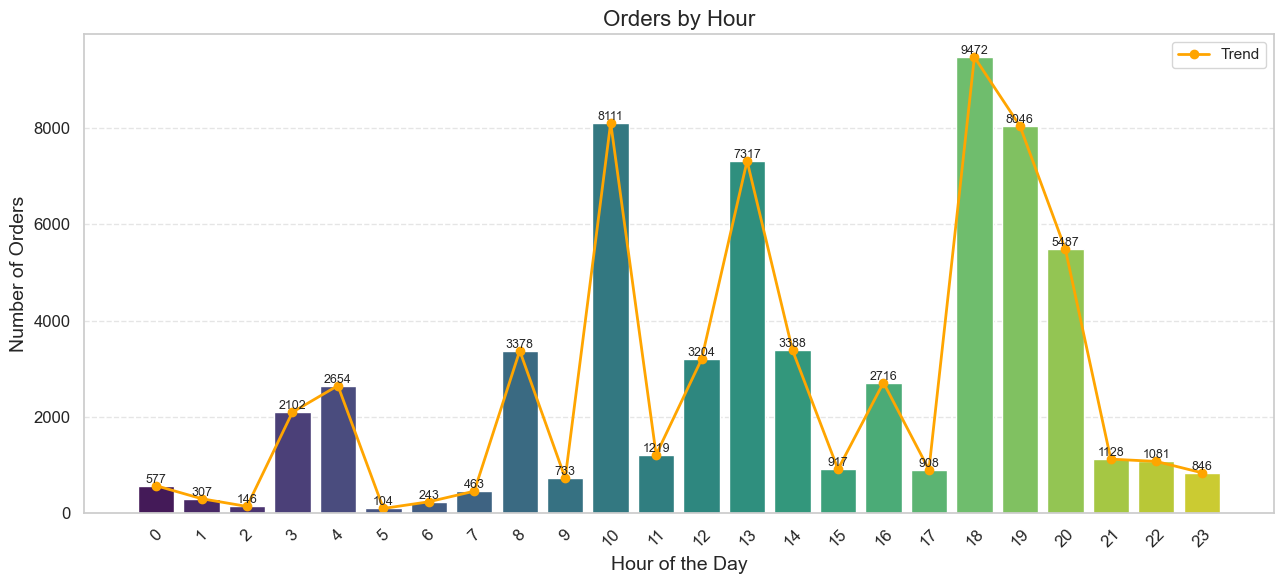

In [32]:
# Chart - 8 visualization code

# Grouping by hour and count of orders
orders_day = df.groupby('hour')['Order_id'].count()

plt.figure(figsize=(13, 6))

# Bar chart
barplot = sns.barplot(x=orders_day.index, y=orders_day.values, palette='viridis')

# Add value labels on bars
for index, value in enumerate(orders_day.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=9)

# Trend line
plt.plot(orders_day.index, orders_day.values, color='orange', marker='o', linestyle='-', linewidth=2, label='Trend')

# Plotting chart
plt.title('Orders by Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_29144\3622949401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_agent.values, y=top_agent.index, palette='crest', edgecolor='black')


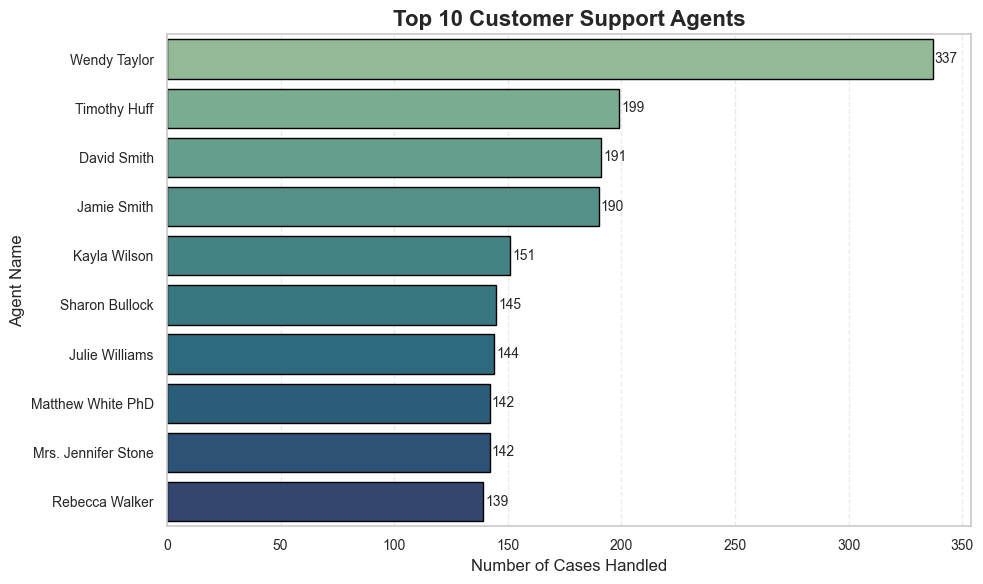

In [33]:
# visualization code

top_agent = df['Agent_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_agent.values, y=top_agent.index, palette='crest', edgecolor='black')

# Add value labels to each bar
for i, v in enumerate(top_agent.values):
    plt.text(v + 1, i, str(v), va='center', fontsize=10)

# Title and axis labels
plt.title('Top 10 Customer Support Agents', fontsize=16, weight='bold')
plt.xlabel('Number of Cases Handled', fontsize=12)
plt.ylabel('Agent Name', fontsize=12)

# Ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


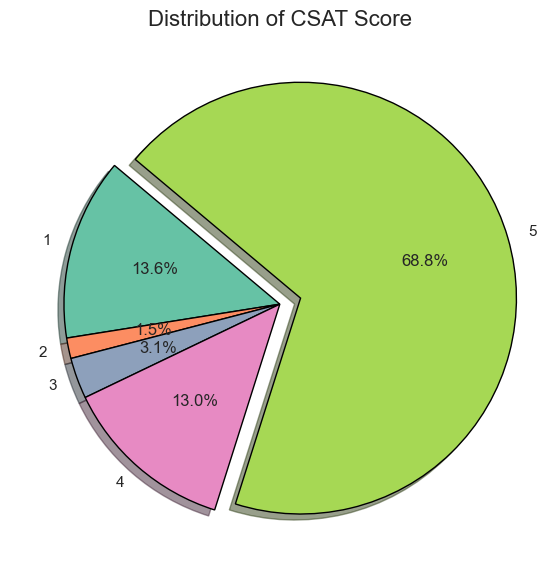

In [34]:
csat_distribution = df['CSAT Score'].value_counts().sort_index()

colors = ['#66c2a5', '#fc8d62', '#8da0bb', '#e78ac3', '#a6d854']  # Feel free to expand or customize

# Highlight the most frequent CSAT score
most_common_score = csat_distribution.idxmax()
explode = [0.1 if score == most_common_score else 0 for score in csat_distribution.index]

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    csat_distribution,
    labels=csat_distribution.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of CSAT Score', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_29144\1164219350.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_category', y='CSAT Score', data=sorted_df, palette='Set2', edgecolor='black')


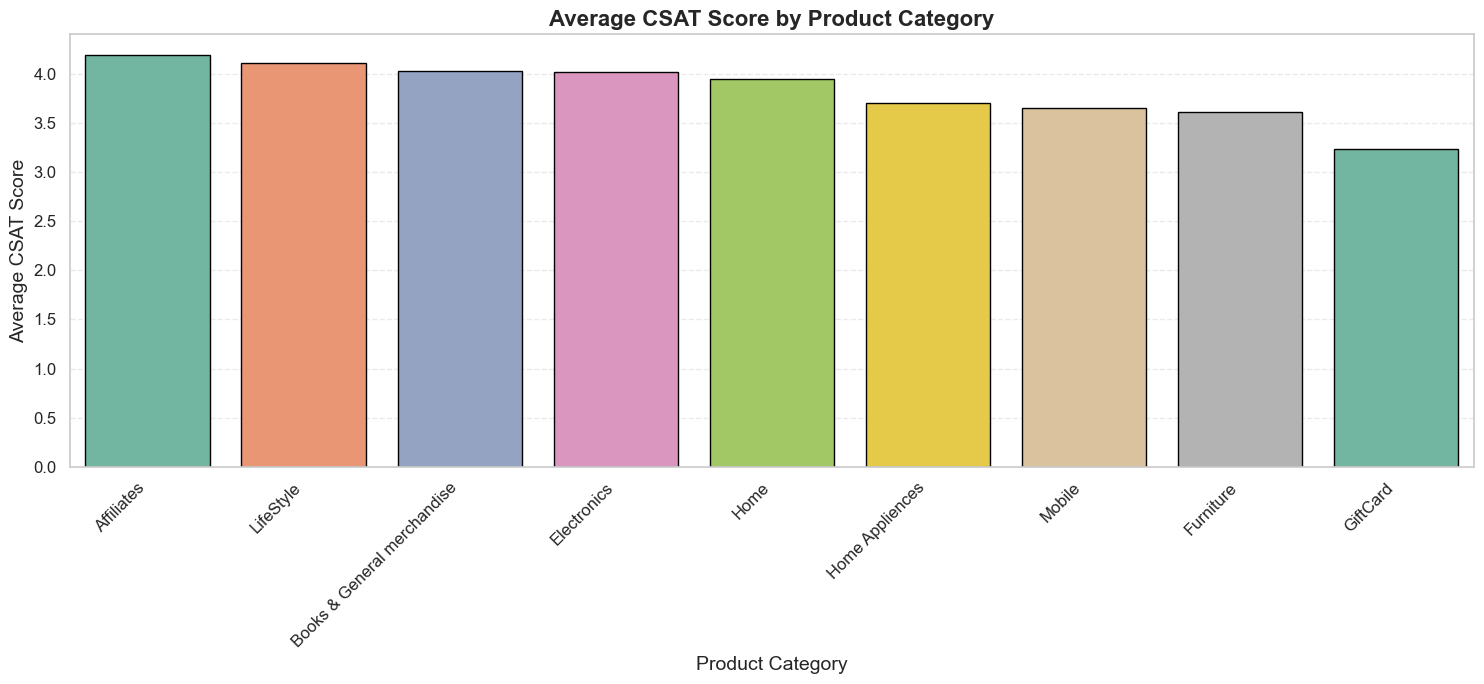

In [35]:
# Chart - 11 visualization code (enhanced)

# Filter out 'Not Available' product categories
filtered_fk_df = df[df['Product_category'] != 'Not Available']

# Sort product categories by average CSAT score
sorted_df = filtered_fk_df.groupby('Product_category')['CSAT Score'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Product_category', y='CSAT Score', data=sorted_df, palette='Set2', edgecolor='black')

plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average CSAT Score', fontsize=14)
plt.title('Average CSAT Score by Product Category', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# pairplot_data = df
# # Plot
# sns.pairplot(pairplot_data, hue='satisfaction_target', palette='husl', diag_kind='kde')
# plt.suptitle("Pair Plot of Key Numeric Features", fontsize=16, y=1.02)
# plt.show()


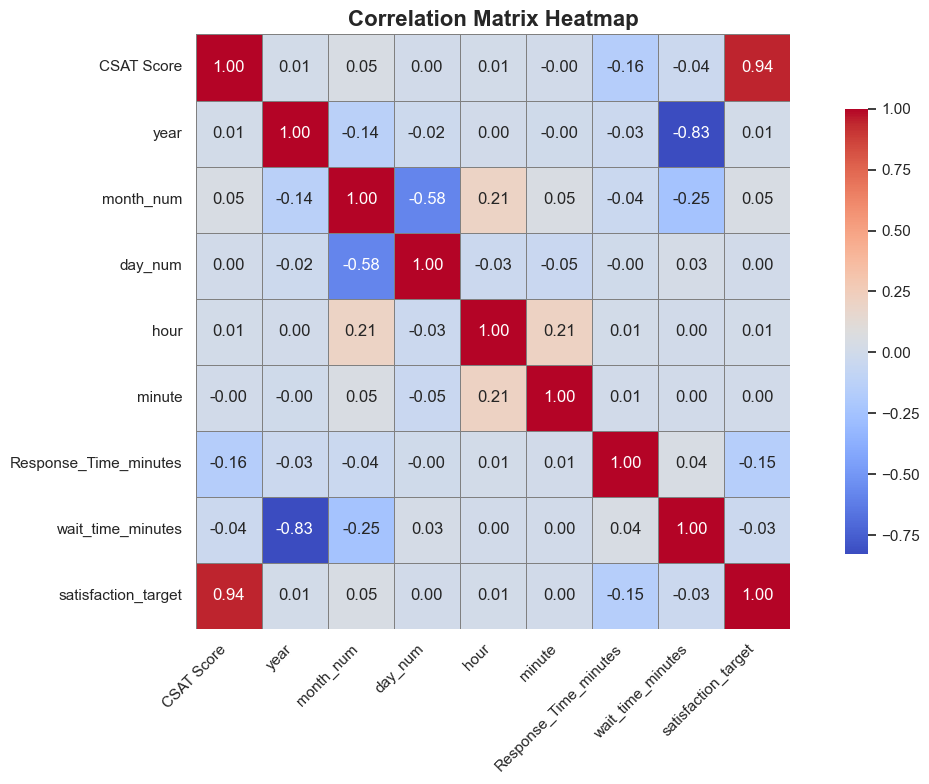

In [37]:
numeric_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


In [38]:
# Check skewness of all numerical columns
df.select_dtypes(include='number').skew()


CSAT Score               -1.617259
year                    -17.792062
month_num                -2.723577
day_num                   0.289880
hour                     -0.560688
minute                    0.023268
Response_Time_minutes     4.848087
wait_time_minutes        13.341699
satisfaction_target      -1.645885
dtype: float64

In [39]:
df = df.drop(columns='CSAT Score')

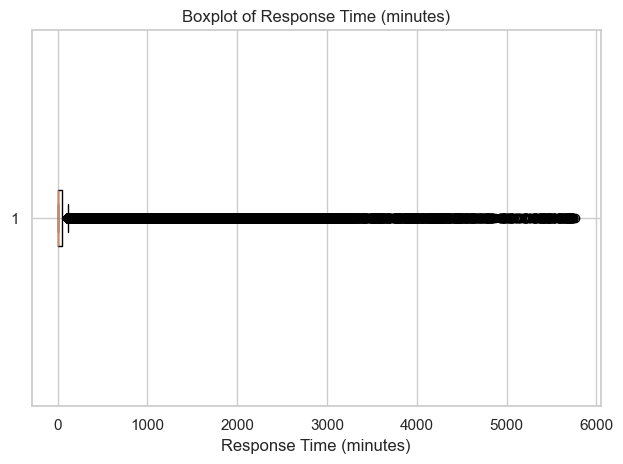

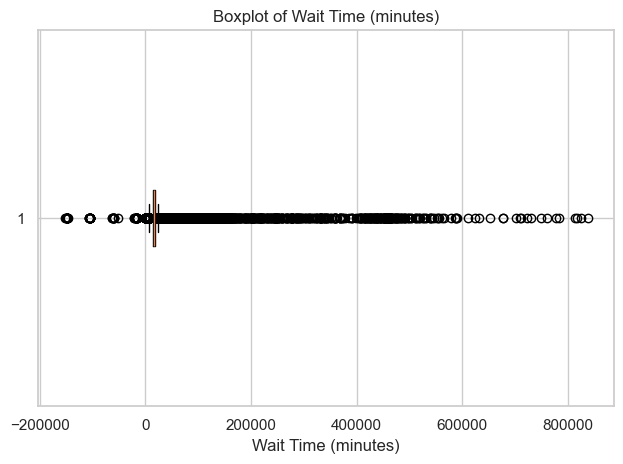

In [40]:
import matplotlib.pyplot as plt

# Boxplot for Response Time in minutes
plt.figure()
plt.boxplot(df['Response_Time_minutes'].dropna(), vert=False)
plt.title('Boxplot of Response Time (minutes)')
plt.xlabel('Response Time (minutes)')
plt.tight_layout()
plt.show()

# Boxplot for Wait Time in minutes
plt.figure()
plt.boxplot(df['wait_time_minutes'].dropna(), vert=False)
plt.title('Boxplot of Wait Time (minutes)')
plt.xlabel('Wait Time (minutes)')
plt.tight_layout()
plt.show()

# # Boxplot for Wait Time in minutes
# plt.figure()
# plt.boxplot(df['Item_price'].dropna(), vert=False)
# plt.title('Boxplot of Wait Time (minutes)')
# plt.xlabel('Item_price')
# plt.tight_layout()
# plt.show()

In [41]:
# 1) List of numeric columns you want to clean
skew_cols = ['Response_Time_minutes', 'wait_time_minutes']

# 2) Function to drop outliers via IQR
def drop_iqr_outliers(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# 3) Apply to your DataFrame
df_iqr = drop_iqr_outliers(df, skew_cols)

# sanity check
print("Original shape:", df.shape)
print("After IQR filter:", df_iqr.shape)


Original shape: (64547, 24)
After IQR filter: (47023, 24)


In [42]:
df_iqr.select_dtypes(include='number').skew()

year                     0.000000
month_num               -1.106989
day_num                  0.268778
hour                    -0.587832
minute                   0.013550
Response_Time_minutes    2.734985
wait_time_minutes       -0.465635
satisfaction_target     -2.026885
dtype: float64

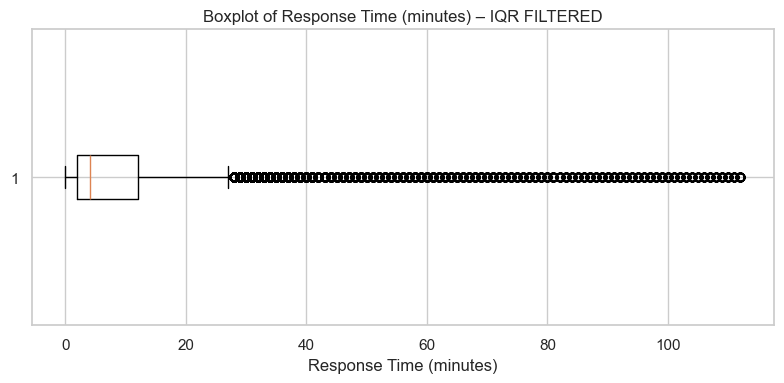

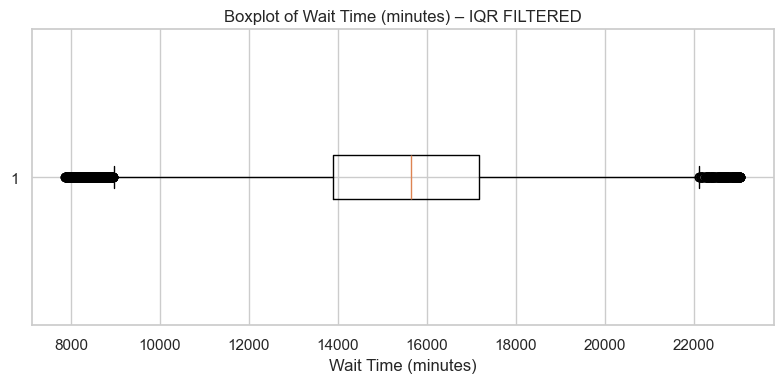

In [43]:
import matplotlib.pyplot as plt

# Boxplot for Response Time in minutes (IQR-filtered)
plt.figure(figsize=(8, 4))
plt.boxplot(df_iqr['Response_Time_minutes'].dropna(), vert=False)
plt.title('Boxplot of Response Time (minutes) – IQR FILTERED')
plt.xlabel('Response Time (minutes)')
plt.tight_layout()
plt.show()

# Boxplot for Wait Time in minutes (IQR-filtered)
plt.figure(figsize=(8, 4))
plt.boxplot(df_iqr['wait_time_minutes'].dropna(), vert=False)
plt.title('Boxplot of Wait Time (minutes) – IQR FILTERED')
plt.xlabel('Wait Time (minutes)')
plt.tight_layout()
plt.show()


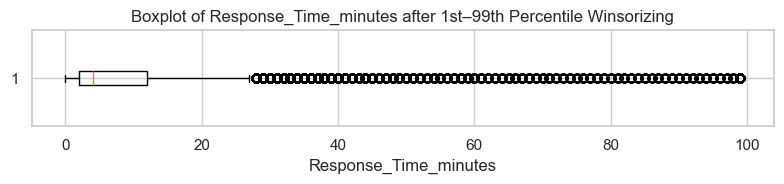

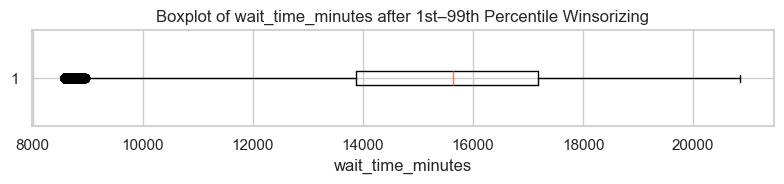

In [44]:
# 1) Define your skewed columns
skew_cols = ['Response_Time_minutes','wait_time_minutes']

# 2) Clip at the 1st and 99th percentiles
for col in skew_cols:
    lo = df_iqr[col].quantile(0.01)
    hi = df_iqr[col].quantile(0.99)
    df_iqr[col] = df_iqr[col].clip(lower=lo, upper=hi)

# 3) Re-plot boxplots to confirm
import matplotlib.pyplot as plt

for col in skew_cols:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df_iqr[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col} after 1st–99th Percentile Winsorizing')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


Optimal λ for Box-Cox: 2.0550


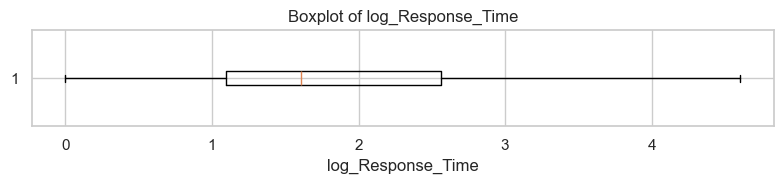

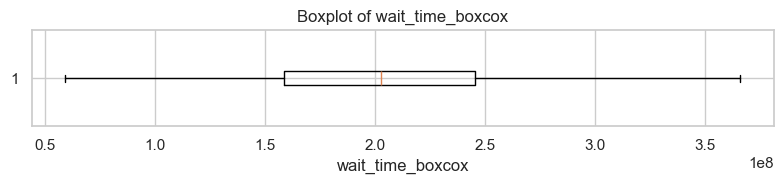

In [45]:
import numpy as np
from scipy.stats import boxcox

df_iqr['log_Response_Time'] = np.log1p(df_iqr['Response_Time_minutes'])

wt = df_iqr['wait_time_minutes']

# This returns (transformed_array, optimal_lambda)
wt_bc, fitted_lambda = boxcox(wt)

# 3) Store just the transformed values in a new column
df_iqr['wait_time_boxcox'] = wt_bc

# 4) (Optional) inspect the λ
print(f"Optimal λ for Box-Cox: {fitted_lambda:.4f}")

# Boxplot on the logs
for col in ['log_Response_Time','wait_time_boxcox']:
    plt.figure(figsize=(8, 2))
    plt.boxplot(df_iqr[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [46]:
df_iqr = df_iqr[df_iqr['satisfaction_target'].between(0, 1)]

In [47]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47023 entries, 0 to 85906
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unique id              47023 non-null  object        
 1   channel_name           47023 non-null  object        
 2   category               47023 non-null  object        
 3   Sub-category           47023 non-null  object        
 4   Customer Remarks       47023 non-null  object        
 5   Order_id               47023 non-null  object        
 6   Survey_response_Date   47023 non-null  datetime64[ns]
 7   Customer_City          47023 non-null  object        
 8   Product_category       47023 non-null  object        
 9   Agent_name             47023 non-null  object        
 10  Supervisor             47023 non-null  object        
 11  Manager                47023 non-null  object        
 12  Agent Shift            47023 non-null  object        
 13  day   

In [48]:
df_iqr['log_Response_Time'].isna().sum()

0

In [49]:
df_iqr['Response_Time_minutes'].info()

<class 'pandas.core.series.Series'>
Index: 47023 entries, 0 to 85906
Series name: Response_Time_minutes
Non-Null Count  Dtype  
--------------  -----  
47023 non-null  float64
dtypes: float64(1)
memory usage: 734.7 KB


In [50]:
df_iqr = df_iqr.drop(['Response_Time_minutes', 'wait_time_minutes'], axis=1)

In [51]:
# Check skewness of all numerical columns
df_iqr.select_dtypes(include='number').skew()


year                   0.000000
month_num             -1.106989
day_num                0.268778
hour                  -0.587832
minute                 0.013550
satisfaction_target   -2.026885
log_Response_Time      0.705139
wait_time_boxcox      -0.056580
dtype: float64

In [52]:
df_iqr['satisfaction_target'].value_counts()

satisfaction_target
1    40247
0     6776
Name: count, dtype: int64

In [53]:
# Ensuring that our target variable remains int.
df_iqr['satisfaction_target'] = df_iqr['satisfaction_target'].astype(int)

In [54]:
df_iqr.drop(columns=['Unique id'], inplace=True)

In [55]:
# 1) Compute cardinality of each column
df_iqr.nunique()

channel_name                3
category                   12
Sub-category               55
Customer Remarks         9186
Order_id                47023
Survey_response_Date       31
Customer_City            1254
Product_category           10
Agent_name               1371
Supervisor                 40
Manager                     6
Agent Shift                 5
day                         7
year                        1
month_num                   2
day_num                    31
hour                       24
minute                     60
month                       2
Experience_Level            3
satisfaction_target         2
log_Response_Time         100
wait_time_boxcox        11520
dtype: int64

In [56]:
#class imbalance
X = df_iqr.drop(columns=['satisfaction_target'])
y = df_iqr['satisfaction_target']

In [57]:
y.value_counts().reset_index()


,satisfaction_target,count
0,1,40247
1,0,6776


In [58]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
oversample = RandomOverSampler(random_state=42)

# Apply oversampling to training data
X, y  = oversample.fit_resample(X, y)

In [59]:
X.shape, y.shape

((80494, 22), (80494,))

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80494 entries, 0 to 80493
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          80494 non-null  object        
 1   category              80494 non-null  object        
 2   Sub-category          80494 non-null  object        
 3   Customer Remarks      80494 non-null  object        
 4   Order_id              80494 non-null  object        
 5   Survey_response_Date  80494 non-null  datetime64[ns]
 6   Customer_City         80494 non-null  object        
 7   Product_category      80494 non-null  object        
 8   Agent_name            80494 non-null  object        
 9   Supervisor            80494 non-null  object        
 10  Manager               80494 non-null  object        
 11  Agent Shift           80494 non-null  object        
 12  day                   80494 non-null  object        
 13  year            

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
# # 2) THEN oversample *only* the training data
# ros = RandomOverSampler(random_state=42)
# X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)
# Binarize y_test for ROC curve calculation (for multi-class problems)
# y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4, 5])  # Ensure all classes 1-5 are included

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (64395, 22) (64395,)
Testing set shape: (16099, 22) (16099,)


In [62]:
# # Identify categorical features with high cardinality (more than 30 unique values)
# cat_features_high_car = [column for column in df_iqr.columns if df_iqr[column].dtype == 'object' and len(df_iqr[column].unique()) > 30]
# cat_features_high_car

In [63]:
# # Identify categorical features with low cardinality (30 or fewer unique values)
# cat_features = [column for column in df_iqr.columns if df_iqr[column].dtype == 'object' and len(df_iqr[column].unique()) <= 30]
# cat_features

In [64]:
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings(
    "ignore",
    message="Found unknown categories in columns",
    category=UserWarning
)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# 1) After all your drops/fills/feature‐extraction/outlier logic, 
#    you have df_iqr and then split into X_train/X_test…

# 3) Identify feature groups on the TRAIN split
numeric_cols   = [c for c in X_train.columns if X_train[c].dtype in ['int64','float64']]
low_card_cols  = [c for c in X_train.select_dtypes('object').columns 
                  if c != 'Customer Remarks' and X_train[c].nunique() <= 30]
high_card_cols = [c for c in X_train.select_dtypes('object').columns 
                  if c != 'Customer Remarks' and X_train[c].nunique() > 30]

# 4) Build your ColumnTransformer
text_vect = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1,2),
    stop_words='english'
)
ct = ColumnTransformer([
    ('tfidf',  text_vect,'Customer Remarks'),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), low_card_cols),
    ('ord',    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),          high_card_cols),
    ('scale',  StandardScaler(),                                                   numeric_cols)
], remainder='drop', sparse_threshold=0)

# 5) Wrap into a Pipeline with a class-weighted RF
pipeline = Pipeline([
    ('preproc', ct),
    ('model',   RandomForestClassifier(
        n_estimators=100,
        max_depth = None,
        min_samples_split=5,
        min_samples_leaf=2,
        
        random_state=42
    ))
])

# 6) Fit on the BALANCED train set, evaluate on the original test set
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      8050
           1       0.85      0.90      0.88      8049

    accuracy                           0.87     16099
   macro avg       0.87      0.87      0.87     16099
weighted avg       0.87      0.87      0.87     16099



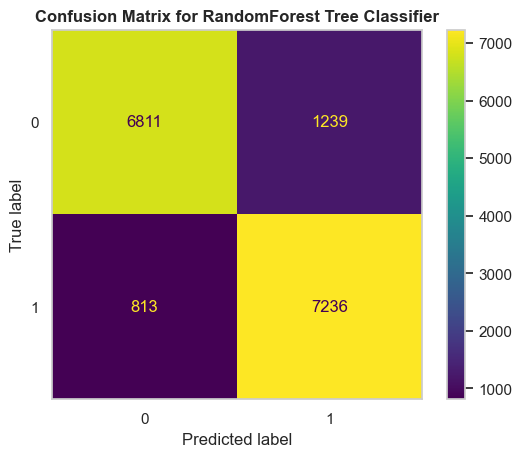

In [65]:
# Plot the confusion matrix for the RandomForest Tree model
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
# Add a title
plt.title('Confusion Matrix for RandomForest Tree Classifier', fontweight='bold')
plt.grid(False)
# Display the plot
plt.show()

In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 4) Fit & transform
ct.fit(X_train)
Xt_train = ct.transform(X_train)
Xt_test  = ct.transform(X_test)

# 5) Initialize your XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=20,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)

# 6) Fit on the balanced, preprocessed train; pass the transformed test as eval_set
xgb.fit(
    Xt_train, y_train,
    eval_set=[(Xt_test, y_test)],
    verbose=False
)

# 7) Predict & evaluate
y_pred = xgb.predict(Xt_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8050
           1       0.97      0.91      0.94      8049

    accuracy                           0.94     16099
   macro avg       0.94      0.94      0.94     16099
weighted avg       0.94      0.94      0.94     16099



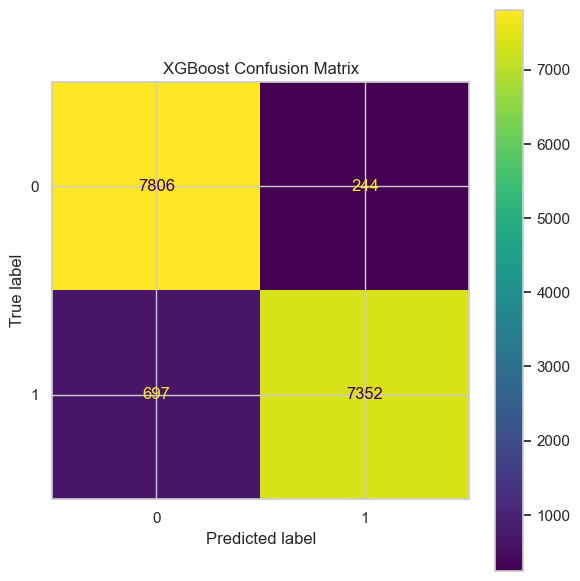

In [67]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
ax.set_title("XGBoost Confusion Matrix")
plt.tight_layout()
plt.show()

In [68]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Fit the shared ColumnTransformer on your X_train
ct.fit(X_train)

# 2) Transform into NumPy arrays, then wrap into DataFrames with fresh names
X_lgb_train = ct.transform(X_train)
X_lgb_test  = ct.transform(X_test)

feature_names = ct.get_feature_names_out()
X_lgb_train_df = pd.DataFrame(X_lgb_train, columns=feature_names, index=X_train.index)
X_lgb_test_df  = pd.DataFrame(X_lgb_test,  columns=feature_names, index=X_test.index)

# 3) Initialize & fit LightGBM
lgbm = LGBMClassifier(
    n_estimators=200,
    objective='binary',
    max_depth=None,
    learning_rate=0.06,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(X_lgb_train_df, y_train)

# 4) Predict
y_lgb_pred = lgbm.predict(X_lgb_test_df)

# 5) Print classification report
print("LightGBM Test Report:\n", classification_report(y_test, y_lgb_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 32198, number of negative: 32197
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.121943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22114
[LightGBM] [Info] Number of data points in the train set: 64395, number of used features: 1148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
LightGBM Test Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71      8050
           1       0.71      0.71      0.71      8049

    accuracy                           0.71     16099
   macro avg       0.71      0.71      0.71     16099
weighted avg       0.71      0.71      0.71     16099



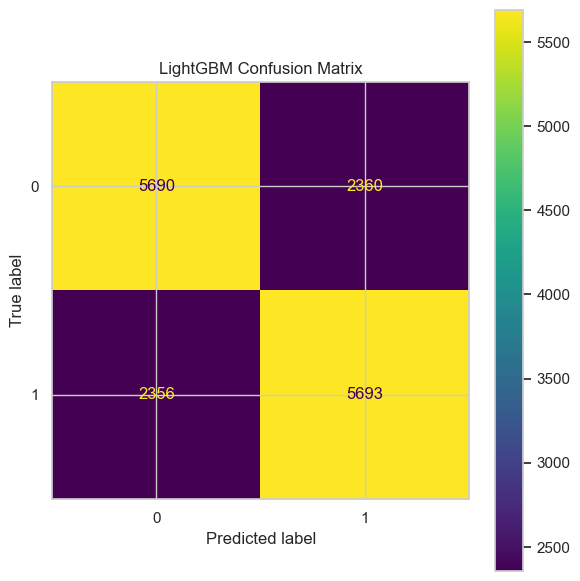

In [69]:
# 6) Plot confusion matrix
cm = confusion_matrix(y_test, y_lgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
ax.set_title("LightGBM Confusion Matrix")
plt.tight_layout()
plt.show()

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64395 entries, 72072 to 14972
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          64395 non-null  object        
 1   category              64395 non-null  object        
 2   Sub-category          64395 non-null  object        
 3   Customer Remarks      64395 non-null  object        
 4   Order_id              64395 non-null  object        
 5   Survey_response_Date  64395 non-null  datetime64[ns]
 6   Customer_City         64395 non-null  object        
 7   Product_category      64395 non-null  object        
 8   Agent_name            64395 non-null  object        
 9   Supervisor            64395 non-null  object        
 10  Manager               64395 non-null  object        
 11  Agent Shift           64395 non-null  object        
 12  day                   64395 non-null  object        
 13  year             

In [71]:
# Saving the model
from joblib import dump

dump(xgb, "xgb_model.joblib")

# dump(pipeline, "rf_pipeline.joblib")

['xgb_model.joblib']

In [72]:
dump(ct,"preprocessor.joblib")

['preprocessor.joblib']

In [84]:
# Combine resampled data into a DataFrame
df_resampled = pd.concat([X, y], axis=1)

# Save as CSV
df_resampled.to_csv("customer_dataset.csv", index=False)
print("CSV file saved successfully!")

CSV file saved successfully!


In [77]:
# Combine resampled data into a DataFrame
df_resampled = pd.concat([X, y], axis=1)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80494 entries, 0 to 80493
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          80494 non-null  object        
 1   category              80494 non-null  object        
 2   Sub-category          80494 non-null  object        
 3   Customer Remarks      80494 non-null  object        
 4   Order_id              80494 non-null  object        
 5   Survey_response_Date  80494 non-null  datetime64[ns]
 6   Customer_City         80494 non-null  object        
 7   Product_category      80494 non-null  object        
 8   Agent_name            80494 non-null  object        
 9   Supervisor            80494 non-null  object        
 10  Manager               80494 non-null  object        
 11  Agent Shift           80494 non-null  object        
 12  day                   80494 non-null  object        
 13  year            

In [82]:
fitted_lambda

2.055044822505855